# Imports

In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap

In [4]:
import geopy

# Data Wrangling

## Open Files with Pythonic Loop

In [5]:
for game in open('games.txt','r'):
    print(game,end='')

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


## Split Data and Correct

In [6]:
for game in open('games.txt','r'):
    words = game.split()           # split lines by whitespace
    city = ' '.join(words[:-1])    # join all words except the last one [:-1]
    year = words[-1].strip('()')   # strip parenthesis from year string
    print(city,year)

Athens 1896
Paris 1900
St Louis 1904
London 1908
Stockholm 1912
Antwerp 1920
Paris 1924
Amsterdam 1928
Los Angeles 1932
Berlin 1936
London 1948
Helsinki 1952
Melbourne / Stockholm 1956
Rome 1960
Tokyo 1964
Mexico 1968
Munich 1972
Montreal 1976
Moscow 1980
Los Angeles 1984
Seoul 1988
Barcelona 1992
Atlanta 1996
Sydney 2000
Athens 2004
Beijing 2008
London 2012
Rio 2016


## Saving the data in Lists

In [7]:
cities, years = [], []

for game in open('games.txt','r'):
    words = game.split()
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
    cities.append(city)
    years.append(year)

# Getting City Coordinates

```python
geopy.geocoders.Nominatim()
```
Nominatim geocoder for OpenStreetMap data.

Documentation at:
    https://wiki.openstreetmap.org/wiki/Nominatim

In [8]:
geolocator = geopy.geocoders.Nominatim(user_agent="my-application")

locations = {}
for city in cities:
    print("Locating",city)
    locations[city] = geolocator.geocode(city.split('/')[0])

Locating Athens
Locating Paris
Locating St Louis
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los Angeles
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne / Stockholm
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los Angeles
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


In [9]:
locations

{'Athens': Location(Athens, Athens-Clarke County, Georgia, 303341458, USA, (33.9597677, -83.376398, 0.0)),
 'Paris': Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0)),
 'St Louis': Location(St. Louis, City of St. Louis, Missouri, USA, (38.6268039, -90.1994097, 0.0)),
 'London': Location(London, Greater London, England, SW1A 2DU, UK, (51.5073219, -0.1276474, 0.0)),
 'Stockholm': Location(Sthlm, Stockholm, Stockholms län, Svealand, 111 29, Sverige, (59.3251172, 18.0710935, 0.0)),
 'Antwerp': Location(Antwerpen, Vlaanderen, België / Belgique / Belgien, (51.2211097, 4.3997081, 0.0)),
 'Amsterdam': Location(Amsterdam, Noord-Holland, Nederland, (52.3745403, 4.89797550561798, 0.0)),
 'Los Angeles': Location(LA, Los Angeles County, California, USA, (34.0536834, -118.2427669, 0.0)),
 'Berlin': Location(Berlin, 10117, Deutschland, (52.5170365, 13.3888599, 0.0)),
 'Helsinki': Location(Helsinki, Helsingin seutukunta, Uusimaa, Etelä-Suomi, Manner-Suomi, Suo

In [10]:
# testing
print(locations["Paris"])   # right infos
print(locations['Rome'])    # right infos
print(locations['Athens'])  # wrong infos

Paris, Île-de-France, France métropolitaine, France
Roma, RM, LAZ, Italia
Athens, Athens-Clarke County, Georgia, 303341458, USA


In [11]:
# correction for wrong location
locations['Athens'] = geolocator.geocode('Athens, Greece')
print(locations['Athens'])

Αθήνα, Δήμος Αθηναίων, Π.Ε. Κεντρικού Τομέα Αθηνών, Περιφέρεια Αττικής, Αττική, 10431, Ελλάδα


# Plotting Map

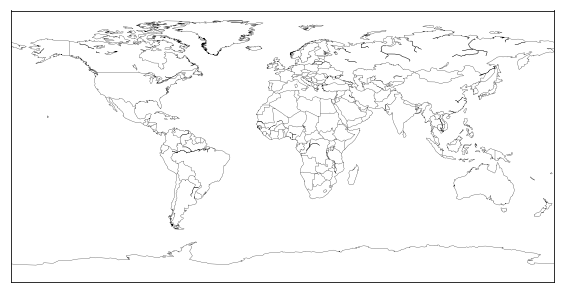

In [12]:
plt.figure(figsize=(10,5))
world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

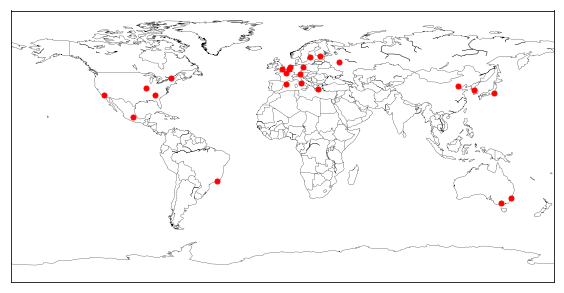

In [13]:
plt.figure(figsize=(10,5))
world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)
for city,pos in locations.items():
    world.plot(pos.longitude,pos.latitude,'r.',markersize=10,latlon=True)

# Various Loop listings

In [14]:
'''
with Enumerate, we can iterate over two poles of an item 
and its ordinal number
'''
for i,city in enumerate(cities[:10]):
    print(i,city)

0 Athens
1 Paris
2 St Louis
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los Angeles
9 Berlin


In [15]:
# get a sorted list
for city in sorted(cities[:10]):
    print(city)

Amsterdam
Antwerp
Athens
Berlin
London
Los Angeles
Paris
Paris
St Louis
Stockholm


In [16]:
# sorted by lengths of city name
for city in sorted(cities[:10],key=len):
    print(city)

Paris
Paris
Athens
London
Berlin
Antwerp
St Louis
Stockholm
Amsterdam
Los Angeles


In [17]:
'''
iterate jointly multiple iterators, 
or sequences which then yield iterators
'''
for year,city in zip(years[:10],cities):
    print(year,city)

1896 Athens
1900 Paris
1904 St Louis
1908 London
1912 Stockholm
1920 Antwerp
1924 Paris
1928 Amsterdam
1932 Los Angeles
1936 Berlin


# List Comprehensions

In [18]:
# Geolocated olympic-city coordinates (from a JSON file):
coordinates_by_city = json.load(open('coords.json','r'))
coordinates_by_city

{'Helsinki': [24.9425683, 60.1674086],
 'Berlin': [13.3888599, 52.5170365],
 'Athens': [-82.1012554, 39.3292396],
 'Barcelona': [2.1771353, 41.3825596],
 'Stockholm': [18.0710935, 59.3251172],
 'Rome': [12.6308541512038, 41.85233365],
 'St Louis': [-90.1978888, 38.6272733],
 'Rio': [-43.2093726, -22.9110136],
 'Beijing': [116.391248, 39.9059631],
 'Montreal': [-73.6125179, 45.497684],
 'Tokyo': [139.294774527387, 34.2255804],
 'Melbourne / Stockholm': [144.9631608, -37.8142175],
 'Seoul': [126.9782914, 37.5666791],
 'London': [-0.1276473, 51.5073219],
 'Sydney': [151.210047, -33.8679573],
 'Mexico': [-99.1333415, 19.4326009],
 'Antwerp': [4.3997081, 51.2211097],
 'Moscow': [37.6174976, 55.7506828],
 'Los Angeles': [-118.2439408, 34.0543942],
 'Munich': [11.5753822, 48.1371079],
 'Atlanta': [-84.3901848, 33.7490987],
 'Amsterdam': [4.89797550561798, 52.3745403],
 'Paris': [2.3514992, 48.8566101]}

In [19]:
# Regular "for" loop
results = []

for city, year in zip(cities,years):
    if int(year) > 1945:
        results.append(city + ': ' + year)
        
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [20]:
# f(element) for element in iterator if condition(element)
results = [city + ': ' + year for city,year in zip(cities,years) if int(year) > 1945]

results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [21]:
# Dictionary Comprehension
cities_by_year = {year: city for city,year in zip(cities,years)}
cities_by_year

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [22]:
cities_after_1930 = {city for year,city in cities_by_year.items() if int(year) > 1930}
cities_after_1930

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne / Stockholm',
 'Mexico',
 'Montreal',
 'Moscow',
 'Munich',
 'Rio',
 'Rome',
 'Seoul',
 'Sydney',
 'Tokyo'}

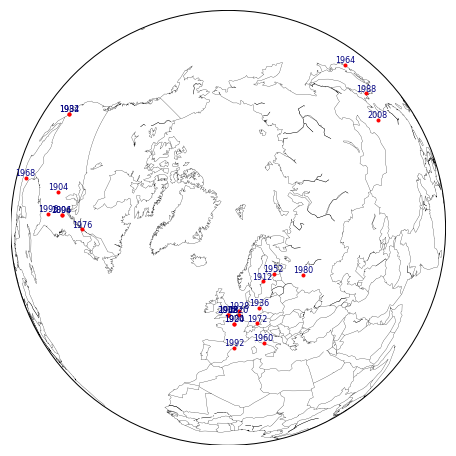

In [25]:
plt.figure(figsize=(8,8))

world = Basemap(projection='ortho',lat_0=75,lon_0=0)

world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for year,city in cities_by_year.items():
    x,y = world(*coordinates_by_city[city])
    
    world.plot(x,y,'r.')
    plt.text(x,y,year,fontsize=8,ha='center',va='bottom',color='navy')

# Generators